# Import library

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets

In [3]:
# dataset_path = os.path.join('E:', os.sep, 'AI', 'dataset', 'vampr')
dataset_path = '/Users/admin/Documents/dataset/vamp'
user_path = os.path.join(dataset_path, 'users_dataset.csv')
item_path = os.path.join(dataset_path, 'items_dataset.csv')
interaction_path = os.path.join(dataset_path, 'vamp_events.json')

In [4]:
user_df = pd.read_csv(user_path)
item_df = pd.read_csv(item_path)
interaction_df = pd.read_json(interaction_path, lines=True)

# Users Dataset

In [5]:
print(len(user_df))
user_df.head(5)

70000


,USER_ID,GENRES,INSTRUMENTS,COUNTRY,AGE
0,4a023c6e-6ade-4b3b-854a-85a8cc9fe807,dance|indie|rock,guitarist|keyboardist|songwriter|front of hous...,CO,22.0
1,445b91ac-da18-4b37-80f7-c174d82cf5af,pop|r&b/soul|acoustic,singer|songwriter|actor,US,22.0
2,f155555d-48c2-4fba-bb26-d5566747e2a8,opera|flamenco|bollywood,singer|music lover,IN,19.0
3,d47d2173-0fb6-41e3-9f13-c34b5c4ccc03,hip hop|punk|hardcore,drummer|composer,US,34.0
4,cbeccf90-fdb9-47fa-be3c-af6854b329f6,pop,producer|music lover|songwriter|composer|pianist,FR,45.0


In [6]:
user_df['GENRES'] = user_df['GENRES'].str.split('|')
user_df = user_df.explode('GENRES')
user_df = user_df.reset_index(drop=True)
user_df.head(5)

,USER_ID,GENRES,INSTRUMENTS,COUNTRY,AGE
0,4a023c6e-6ade-4b3b-854a-85a8cc9fe807,dance,guitarist|keyboardist|songwriter|front of hous...,CO,22.0
1,4a023c6e-6ade-4b3b-854a-85a8cc9fe807,indie,guitarist|keyboardist|songwriter|front of hous...,CO,22.0
2,4a023c6e-6ade-4b3b-854a-85a8cc9fe807,rock,guitarist|keyboardist|songwriter|front of hous...,CO,22.0
3,445b91ac-da18-4b37-80f7-c174d82cf5af,pop,singer|songwriter|actor,US,22.0
4,445b91ac-da18-4b37-80f7-c174d82cf5af,r&b/soul,singer|songwriter|actor,US,22.0


In [7]:
user_df['INSTRUMENTS'] = user_df['INSTRUMENTS'].str.split('|')
user_df = user_df.explode('INSTRUMENTS')
user_df = user_df.reset_index(drop=True)
user_df.head(5)

,USER_ID,GENRES,INSTRUMENTS,COUNTRY,AGE
0,4a023c6e-6ade-4b3b-854a-85a8cc9fe807,dance,guitarist,CO,22.0
1,4a023c6e-6ade-4b3b-854a-85a8cc9fe807,dance,keyboardist,CO,22.0
2,4a023c6e-6ade-4b3b-854a-85a8cc9fe807,dance,songwriter,CO,22.0
3,4a023c6e-6ade-4b3b-854a-85a8cc9fe807,dance,front of house engineer,CO,22.0
4,4a023c6e-6ade-4b3b-854a-85a8cc9fe807,dance,composer,CO,22.0


In [8]:
user_df['GENRES'].value_counts()

GENRES
rock               78500
pop                64071
hip hop            59110
r&b/soul           54291
indie              47215
                   ...  
big band               1
americana music        1
anyone                 1
goodvibes              1
baggy                  1
Name: count, Length: 2112, dtype: int64

In [9]:
user_df['COUNTRY'].value_counts()

COUNTRY
US    224551
GB     44392
IN     40034
ES     35873
BR     33861
       ...  
GF         3
GG         3
MQ         2
MW         1
CG         1
Name: count, Length: 155, dtype: int64

In [10]:
user_df['AGE'].value_counts()

AGE
23.0     40038
22.0     39462
24.0     38543
21.0     37665
20.0     37300
         ...  
77.0         8
103.0        8
94.0         6
79.0         4
101.0        4
Name: count, Length: 88, dtype: int64

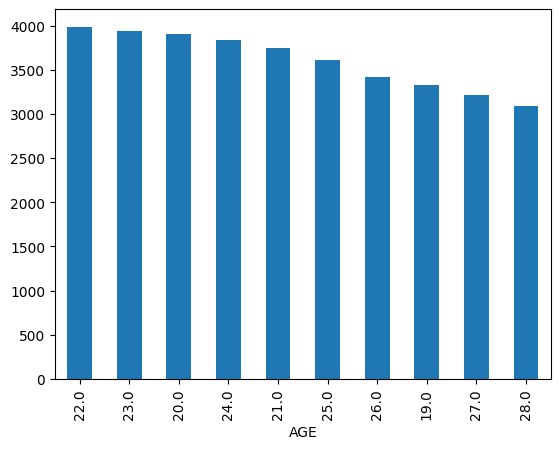

In [74]:
user_df.groupby('AGE')['USER_ID'].nunique().sort_values(ascending=False).head(10).plot(kind='bar')
plt.savefig('user_age.png', bbox_inches='tight')

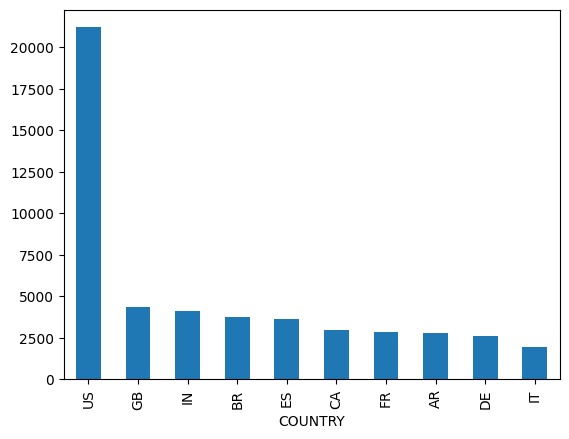

In [73]:
user_df.groupby('COUNTRY')['USER_ID'].nunique().sort_values(ascending=False).head(10).plot(kind='bar')
plt.savefig('user_country.png', bbox_inches='tight')

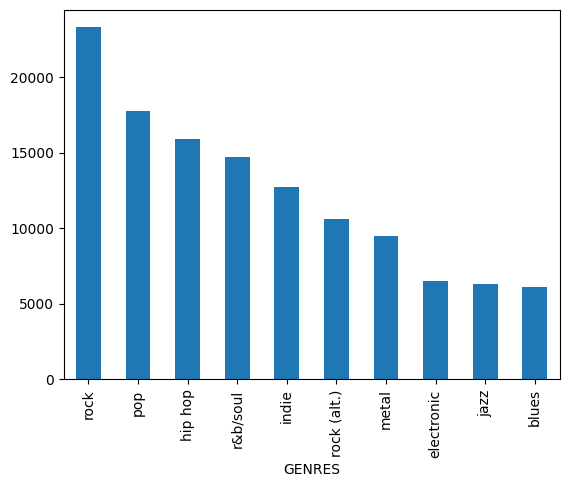

In [72]:
user_df.groupby('GENRES')['USER_ID'].nunique().sort_values(ascending=False).head(10).plot(kind='bar')
plt.savefig('user_genres.png', bbox_inches='tight')

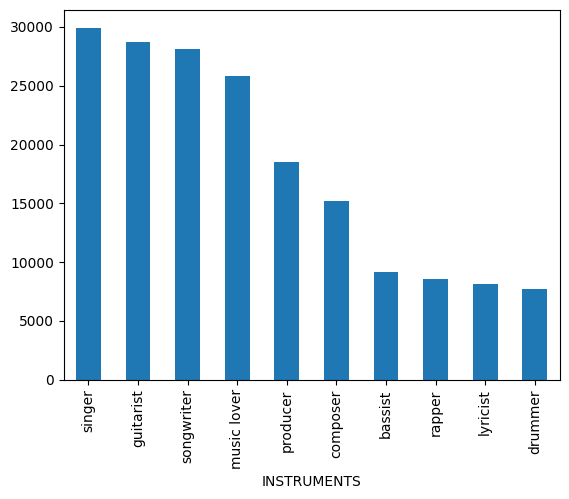

In [71]:
user_df.groupby('INSTRUMENTS')['USER_ID'].nunique().sort_values(ascending=False).head(10).plot(kind='bar')
plt.savefig('user_instruments.png', bbox_inches='tight')

# Items Dataset

In [11]:
print(len(item_df))
item_df.head(5)

9933


,ITEM_ID,GENRES,GENRE_L2,GENRE_L3,CONTENT_OWNER,CREATION_TIMESTAMP
0,156294,looking for a collab - rapper,hip hop|jazz|r&b/soul,US,3a831b66-6a8f-41aa-a2c5-38faf336b83a,1677133300
1,156293,new release,metal|trap|progressive metal,MX,fea5d30a-ebb9-4984-94e8-d5c087bcbcf5,1677125731
2,156292,work in progress,punk|rock,US,e935e4c7-d31a-4722-80dd-32a311b1bc28,1677119923
3,156291,looking for a collab - producer,hip hop,CA,baa435eb-39ac-461c-8fd7-493f6c5f938b,1677119627
4,156290,looking for a collab - band,punk|rock,US,e935e4c7-d31a-4722-80dd-32a311b1bc28,1677118758


In [12]:
item_df['GENRE_L2'] = item_df['GENRE_L2'].str.split('|')
item_df = item_df.explode('GENRE_L2')
item_df = item_df.reset_index(drop=True)
item_df.head(5)

,ITEM_ID,GENRES,GENRE_L2,GENRE_L3,CONTENT_OWNER,CREATION_TIMESTAMP
0,156294,looking for a collab - rapper,hip hop,US,3a831b66-6a8f-41aa-a2c5-38faf336b83a,1677133300
1,156294,looking for a collab - rapper,jazz,US,3a831b66-6a8f-41aa-a2c5-38faf336b83a,1677133300
2,156294,looking for a collab - rapper,r&b/soul,US,3a831b66-6a8f-41aa-a2c5-38faf336b83a,1677133300
3,156293,new release,metal,MX,fea5d30a-ebb9-4984-94e8-d5c087bcbcf5,1677125731
4,156293,new release,trap,MX,fea5d30a-ebb9-4984-94e8-d5c087bcbcf5,1677125731


In [13]:
item_df['GENRES'].value_counts()

GENRES
work in progress                                  6207
new release                                       5520
cover                                             5314
looking for a collab - singer                     2093
looking for a collab - producer                   1354
                                                  ... 
looking for a collab - didgeridooist                 3
looking for a collab - woodwind player               3
looking for a collab - radio plugger                 3
looking for a collab - front of house engineer       3
looking for a collab - cellist                       1
Name: count, Length: 65, dtype: int64

In [14]:
item_df['GENRE_L2'].value_counts()

GENRE_L2
hip hop            3456
r&b/soul           3274
pop                2995
rock               2507
indie              1829
                   ... 
symphonic metal       1
afropunk              1
#sertanejo            1
musical theatre       1
soulpop               1
Name: count, Length: 471, dtype: int64

In [15]:
item_df['GENRE_L3'].value_counts()

GENRE_L3
US    12297
GB     1720
CA     1278
BR     1209
IN     1178
      ...  
LT        2
TH        1
BJ        1
AM        1
SG        1
Name: count, Length: 92, dtype: int64

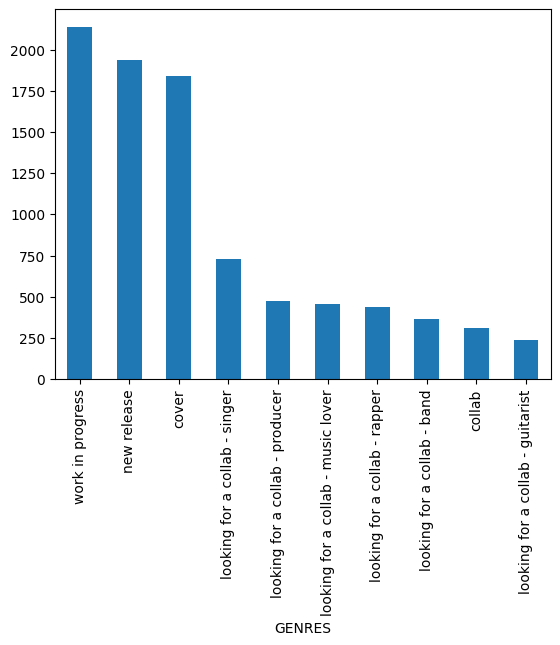

In [75]:
item_df.groupby('GENRES')['ITEM_ID'].nunique().sort_values(ascending=False).head(10).plot(kind='bar')
plt.savefig('item_genres.png', bbox_inches='tight')

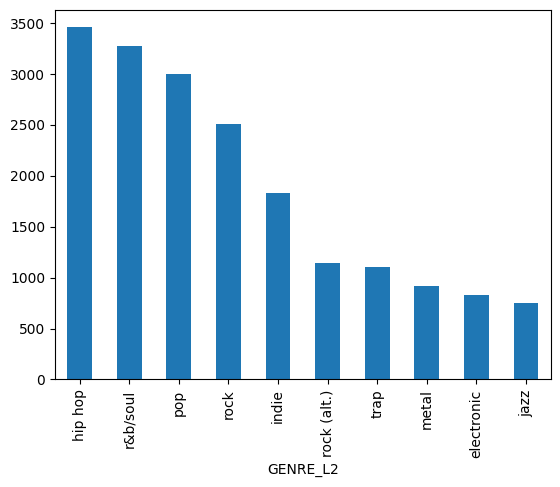

In [77]:
item_df.groupby('GENRE_L2')['ITEM_ID'].nunique().sort_values(ascending=False).head(10).plot(kind='bar')
plt.savefig('item_genres_2.png', bbox_inches='tight')

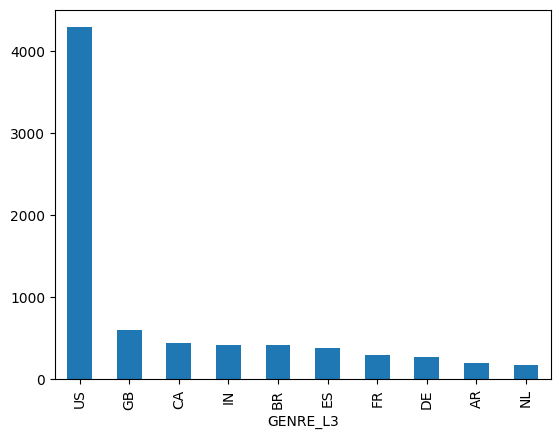

In [78]:
item_df.groupby('GENRE_L3')['ITEM_ID'].nunique().sort_values(ascending=False).head(10).plot(kind='bar')
plt.savefig('item_genres_3.png', bbox_inches='tight')

# Interactions Dataset

In [16]:
print(len(interaction_df))
interaction_df.head(5)

1123272


,event,user_id,content_id,total_duration_s,total_viewed_s,timestamp
0,Vamp Viewed,a6b371f6-d924-453f-b705-4b6f0e9835c5,151356,58.958367,10.809,2023-02-01 00:29:55
1,Vamp Viewed,a6b371f6-d924-453f-b705-4b6f0e9835c5,151112,59.036735,32.213,2023-02-01 00:30:16
2,Vamp Viewed,7e751c13-383d-4b3d-8adf-f290887158a8,152633,37.100000,4.287,2023-02-01 14:06:42
3,Vamp Viewed,7e751c13-383d-4b3d-8adf-f290887158a8,152503,5.903673,22.081,2023-02-01 14:07:04
4,Vamp Viewed,7e751c13-383d-4b3d-8adf-f290887158a8,148362,59.024000,3.826,2023-02-01 14:07:08


In [17]:
interaction_df['event'].value_counts()

event
Vamp Viewed       1072280
Vamp Liked          45704
Vamp Commented       5288
Name: count, dtype: int64

In [26]:
interaction_df['user_id'].nunique()

83091

In [28]:
interaction_df['content_id'].nunique()

31004

In [25]:
new_interaction_file = os.path.join(dataset_path, 'interactions_dataset.csv')
interaction_df.reset_index()

rows = []
for i, row in interaction_df.iterrows():
    user_id = row['user_id']
    item_id = row['content_id']
    total_duration_s = row['total_duration_s']
    total_viewed_s = row['total_viewed_s']
    timestamp = row['timestamp']
    event = row['event']
    if event == 'Vamp Liked' or event == 'Vamp Commented' or total_viewed_s / (total_duration_s + 1e-12) >= 0.3:
        d = {'USER_ID': user_id, 'ITEM_ID': int(item_id), 'EVENT_TYPE': 'watch', 'EVENT_VALUE': 1, 'TIMESTAMP': timestamp}
        rows.append(d)

new_interaction_df = pd.DataFrame(data=rows)
new_interaction_df.to_csv(new_interaction_file, index=False)

In [29]:
len(new_interaction_df)

523508

In [31]:
new_interaction_df['USER_ID'].nunique()

72378

In [32]:
new_interaction_df['ITEM_ID'].nunique()

28307

In [30]:
new_interaction_df.groupby('USER_ID', as_index=False).aggregate(lambda x: list(x)).head(10)

,USER_ID,ITEM_ID,EVENT_TYPE,EVENT_VALUE,TIMESTAMP
0,00001be6-1331-448d-9cf2-e46c4209b72d,"[158036, 158037, 158044, 158042, 135063, 15804...","[watch, watch, watch, watch, watch, watch, wat...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[2023-03-21 03:10:50, 2023-03-21 03:30:45, 202..."
1,00007997-73df-4d41-b876-d4f4b12974ac,[151162],[watch],[1],[2023-02-27 12:33:22]
2,0000b5e8-5454-4e9b-af3d-3a1686a6a6a6,[154426],[watch],[1],[2023-08-10 12:44:00]
3,0000d9c3-688c-417a-98bf-195a2fbb4e4c,"[154512, 150612, 157483, 157482, 149256]","[watch, watch, watch, watch, watch]","[1, 1, 1, 1, 1]","[2023-04-24 14:34:28, 2023-04-24 14:38:31, 202..."
4,00012f41-8a5f-433c-b851-026ef1dea896,"[139619, 137803]","[watch, watch]","[1, 1]","[2023-07-21 14:45:10, 2023-07-21 14:45:23]"
5,0001cc30-5d8f-4dc5-a05d-1be0f2992daa,"[161121, 161121, 138177, 139619, 142819, 16112...","[watch, watch, watch, watch, watch, watch, watch]","[1, 1, 1, 1, 1, 1, 1]","[2023-05-14 07:42:49, 2023-05-14 07:48:01, 202..."
6,000305f5-5559-4597-b6e0-13b08a43020d,"[138177, 137803, 146960]","[watch, watch, watch]","[1, 1, 1]","[2023-07-27 01:41:46, 2023-07-27 01:54:08, 202..."
7,000315a1-a21c-4e4d-85ed-d1be05dc3340,"[137939, 146759]","[watch, watch]","[1, 1]","[2023-07-26 21:30:17, 2023-07-26 21:32:04]"
8,0003dabc-bf53-4293-b0f4-ef11c8afb614,"[159296, 159279, 139619, 159279, 159086, 163233]","[watch, watch, watch, watch, watch, watch]","[1, 1, 1, 1, 1, 1]","[2023-11-10 03:19:06, 2023-11-10 03:19:22, 202..."
9,00058280-e279-4ad2-90a1-7b4377320898,[138177],[watch],[1],[2023-01-04 14:32:55]


In [47]:
new_interaction_df.sort_values(by=['USER_ID', 'TIMESTAMP'], ascending=True, inplace=True)
new_interaction_df.iloc[int(.9 * len(new_interaction_df)):, :]

,USER_ID,ITEM_ID,EVENT_TYPE,EVENT_VALUE,TIMESTAMP
466184,e6b21697-9c7c-4021-97f6-ae6daacdc04a,146838,watch,1,2023-11-26 08:51:18
466185,e6b21697-9c7c-4021-97f6-ae6daacdc04a,146832,watch,1,2023-11-26 08:51:44
466186,e6b21697-9c7c-4021-97f6-ae6daacdc04a,146829,watch,1,2023-11-26 08:52:06
466187,e6b21697-9c7c-4021-97f6-ae6daacdc04a,146828,watch,1,2023-11-26 08:52:58
466188,e6b21697-9c7c-4021-97f6-ae6daacdc04a,146826,watch,1,2023-11-26 08:53:15
...,...,...,...,...,...
319771,fffbfe8f-a28d-4984-aa0e-a1d1d262dc2d,156959,watch,1,2023-08-25 16:13:25
319772,fffbfe8f-a28d-4984-aa0e-a1d1d262dc2d,160762,watch,1,2023-08-25 16:13:45
319773,fffbfe8f-a28d-4984-aa0e-a1d1d262dc2d,163698,watch,1,2023-08-25 16:13:59
255331,fffd1773-cd4d-43ca-93b1-416b5bb3496d,137154,watch,1,2023-07-06 05:53:08


In [46]:
test = new_interaction_df.iloc[int(.9 * len(new_interaction_df)):, :]
leave_one_out_test = test.groupby('USER_ID').last().reset_index()
leave_one_out_test.head(10)

,USER_ID,ITEM_ID,EVENT_TYPE,EVENT_VALUE,TIMESTAMP
0,0003dabc-bf53-4293-b0f4-ef11c8afb614,163233,watch,1,2023-11-12 01:11:07
1,001abaf6-4f3f-4e4f-b8e1-681812ce1e74,173933,watch,1,2023-11-20 01:39:36
2,001b1203-a029-47bf-b7ba-9e906e844ae9,158652,watch,1,2023-11-21 04:53:31
3,001fa58c-283a-4454-843a-4b831f8b577a,168810,watch,1,2023-11-30 08:52:36
4,0028f091-bc2a-4d02-86c8-a802da410c81,172664,watch,1,2023-11-14 17:54:33
5,002b722b-0d60-453d-b86d-f6803cd71894,138134,watch,1,2023-11-14 15:51:20
6,002e0b52-9303-46ce-b35c-bc49df70246a,171047,watch,1,2023-11-20 20:46:07
7,00315c71-7abf-4ee4-8c6c-6ef215b70bd4,146922,watch,1,2023-11-19 07:35:15
8,00365993-e06c-4e38-a7ab-903967d55b06,176912,watch,1,2023-11-30 11:45:12
9,003ed753-1c36-4bd2-aca7-0b7e7cb42934,158619,watch,1,2023-11-23 03:27:04


# Join Datasets

In [19]:
df = pd.merge(user_df, interaction_df, on='USER_ID')
df = pd.merge(df, item_df, on='ITEM_ID', suffixes=('_USER', '_ITEM'))
print(df.__len__())
df.head(10)

755076


,USER_ID,GENRES_USER,INSTRUMENTS,COUNTRY,AGE,ITEM_ID,EVENT_TYPE,TIMESTAMP,EVENT_VALUE,GENRES_ITEM,GENRE_L2,GENRE_L3,CONTENT_OWNER,CREATION_TIMESTAMP
0,cbeccf90-fdb9-47fa-be3c-af6854b329f6,pop,producer,FR,45.0,148936,watch,1668937892,1,looking for a collab - producer,pop,FR,af08689f-f330-4566-b3bf-ea53016224fa,1668862984
1,cbeccf90-fdb9-47fa-be3c-af6854b329f6,pop,producer,FR,45.0,148936,watch,1668937892,1,looking for a collab - producer,acoustic,FR,af08689f-f330-4566-b3bf-ea53016224fa,1668862984
2,cbeccf90-fdb9-47fa-be3c-af6854b329f6,pop,producer,FR,45.0,148936,watch,1668947892,1,looking for a collab - producer,pop,FR,af08689f-f330-4566-b3bf-ea53016224fa,1668862984
3,cbeccf90-fdb9-47fa-be3c-af6854b329f6,pop,producer,FR,45.0,148936,watch,1668947892,1,looking for a collab - producer,acoustic,FR,af08689f-f330-4566-b3bf-ea53016224fa,1668862984
4,cbeccf90-fdb9-47fa-be3c-af6854b329f6,pop,music lover,FR,45.0,148936,watch,1668937892,1,looking for a collab - producer,pop,FR,af08689f-f330-4566-b3bf-ea53016224fa,1668862984
5,cbeccf90-fdb9-47fa-be3c-af6854b329f6,pop,music lover,FR,45.0,148936,watch,1668937892,1,looking for a collab - producer,acoustic,FR,af08689f-f330-4566-b3bf-ea53016224fa,1668862984
6,cbeccf90-fdb9-47fa-be3c-af6854b329f6,pop,music lover,FR,45.0,148936,watch,1668947892,1,looking for a collab - producer,pop,FR,af08689f-f330-4566-b3bf-ea53016224fa,1668862984
7,cbeccf90-fdb9-47fa-be3c-af6854b329f6,pop,music lover,FR,45.0,148936,watch,1668947892,1,looking for a collab - producer,acoustic,FR,af08689f-f330-4566-b3bf-ea53016224fa,1668862984
8,cbeccf90-fdb9-47fa-be3c-af6854b329f6,pop,songwriter,FR,45.0,148936,watch,1668937892,1,looking for a collab - producer,pop,FR,af08689f-f330-4566-b3bf-ea53016224fa,1668862984
9,cbeccf90-fdb9-47fa-be3c-af6854b329f6,pop,songwriter,FR,45.0,148936,watch,1668937892,1,looking for a collab - producer,acoustic,FR,af08689f-f330-4566-b3bf-ea53016224fa,1668862984


In [20]:
df.groupby(['USER_ID', 'ITEM_ID'], as_index=False).aggregate(lambda x: list(set(x))).head(10)

,USER_ID,ITEM_ID,GENRES_USER,INSTRUMENTS,COUNTRY,AGE,EVENT_TYPE,TIMESTAMP,EVENT_VALUE,GENRES_ITEM,GENRE_L2,GENRE_L3,CONTENT_OWNER,CREATION_TIMESTAMP
0,0008c7bb-3343-4e8a-8cd5-cb393f76ad05,139619,[gospel],"[singer, keyboardist, music director, songwrit...",[NG],[28.0],[watch],"[1674838741, 1674828741]",[1],[looking for a collab - band],"[rock, indie, blues]",[JE],[e4c45bd2-f2a4-4f9d-9f2d-64c6929e92d3],[1664891757]
1,0016922a-f72c-44d4-a404-936098d4f9e4,136478,"[indie, electronic]","[songwriter, singer, producer]",[IT],[28.0],[watch],"[1675344412, 1675354412]",[1],[new release],"[pop/rock, pop/punk, pop]",[ES],[33b93d5a-b791-4c23-b95f-7e76c2998f0e],[1664105301]
2,00362923-67b3-4791-8872-02436dd60141,138177,"[r&b/soul, trap, rock]","[composer, producer]",[DO],[28.0],[watch],"[1673670701, 1673660701]",[1],[looking for a collab - music lover],"[world music, electro-funk, avant-pop]",[US],[a2fae4c9-cfe7-4aa8-ac31-66b619c4e27f],[1664542231]
3,007c33ad-6d9c-4e78-9446-96e32eeffd8f,150273,"[r&b/soul, trap, hip hop]","[mastering engineer, beatmaker, music lover, s...",[CA],[27.0],[watch],"[1675916086, 1675906086]",[1],[work in progress],[r&b/soul],[CA],[65254845-da32-4a6d-ba9e-086e23754ef3],[1670820076]
4,00802b64-4a33-4c58-aa2a-43f7551c1888,153319,"[rock (alt.), psychedelic, indie]","[drummer, bassist]",[BR],[36.0],[watch],"[1675613416, 1675623416]",[1],[work in progress],"[r&b/soul, blues, rock]",[BR],[91c5a449-602f-4e6e-8957-4c902a7736bd],[1674179763]
5,008b4947-2573-458a-bf91-4529e4450e7b,140891,"[acoustic, rock, pop]","[guitarist, singer, music lover, dancer, ukule...",[ES],[34.0],[watch],"[1673501694, 1673491694]",[1],[work in progress],"[jazz, r&b/soul, funk]",[GB],[d16f32cf-835d-49c0-9f4c-8079a14c0b51],[1665161387]
6,008b4947-2573-458a-bf91-4529e4450e7b,146890,"[acoustic, rock, pop]","[guitarist, singer, music lover, dancer, ukule...",[ES],[34.0],[watch],"[1673501868, 1673491868]",[1],[cover],"[r&b/soul, hip hop, pop]",[US],[1b90053e-d19a-4333-b500-85463e2d9e91],[1666587428]
7,00953402-a43c-4540-85d6-5282be5d7148,138177,"[hip hop, pop]","[music lover, singer, producer, guitarist]",[US],[53.0],[watch],"[1675094665, 1675104665]",[1],[looking for a collab - music lover],"[world music, electro-funk, avant-pop]",[US],[a2fae4c9-cfe7-4aa8-ac31-66b619c4e27f],[1664542231]
8,009781d8-95f4-4403-b004-b029d2da4425,134764,"[rock, electronic, pop]","[producer, video director, guitarist, dj, comp...",[BR],[22.0],[watch],"[1674181567, 1674171567]",[1],[work in progress],"[world music, electro-funk, avant-pop]",[US],[a2fae4c9-cfe7-4aa8-ac31-66b619c4e27f],[1663688008]
9,009781d8-95f4-4403-b004-b029d2da4425,153160,"[rock, electronic, pop]","[producer, video director, guitarist, dj, comp...",[BR],[22.0],[watch],"[1674014803, 1674004803]",[1],[new release],"[rock, electronic, pop]",[BR],[009781d8-95f4-4403-b004-b029d2da4425],[1674003854]
